<a href="https://colab.research.google.com/github/kurama3758-web/TOPSIS-Project/blob/main/TOPSIS_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [4]:
df = pd.read_csv("data.csv")
df


,Model,Price,Mileage,Comfort,Safety
0,A,250000,20,7,8
1,B,300000,18,8,9
2,C,200000,22,6,7


In [5]:
def topsis(df, weights, impacts):
    data = df.iloc[:, 1:].values.astype(float)
    weights = np.array(weights)

    norm = np.sqrt((data ** 2).sum(axis=0))
    weighted = (data / norm) * weights

    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted[:, i].max())
            ideal_worst.append(weighted[:, i].min())
        else:
            ideal_best.append(weighted[:, i].min())
            ideal_worst.append(weighted[:, i].max())

    s_plus = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    s_minus = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

    return s_minus / (s_plus + s_minus)


In [6]:
weights = [1, 1, 1, 1]
impacts = ['+', '-', '+', '+']

df["Topsis Score"] = topsis(df, weights, impacts)
df["Rank"] = df["Topsis Score"].rank(ascending=False)

df


,Model,Price,Mileage,Comfort,Safety,Topsis Score,Rank
0,A,250000,20,7,8,0.5,2.0
1,B,300000,18,8,9,1.0,1.0
2,C,200000,22,6,7,0.0,3.0


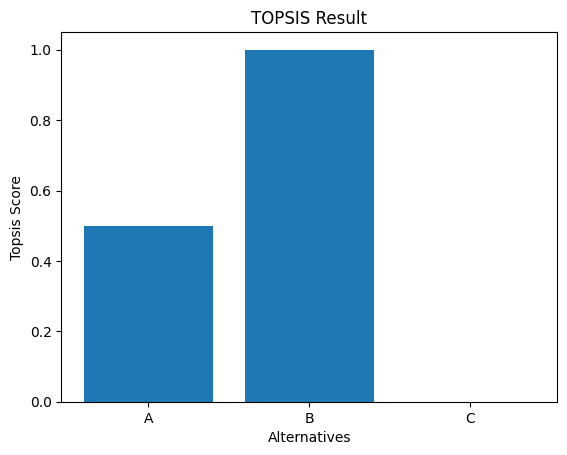

In [7]:
plt.bar(df.iloc[:, 0], df["Topsis Score"])
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Result")
plt.show()
